In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore') 
#plt.style.use('seaborn')
plt.style.use('fivethirtyeight')

In [ ]:
admt=pd.read_csv('Admission_Predict.csv')


In [ ]:
admt.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admt.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
print('Rows     :',admt.shape[0])
print('Columns  :',admt.shape[1])
print('\nFeatures :\n     :',admt.columns.tolist())
print('\nMissing values    :',admt.isnull().values.sum())
print('\nUnique values :  \n',admt.nunique())

Rows     : 400
Columns  : 9

Features :
     : ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Missing values    : 0

Unique values :  
 Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64


In [ ]:
admt.columns.to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [ ]:
admt.count().to_frame().T


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,400,400,400,400,400,400,400,400,400


In [ ]:
print("There are",len(admt.columns),"columns:")
for x in admt.columns:
    sys.stdout.write(str(x)+", ")                                                      #admt.columns also works 


There are 9 columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

In [ ]:
admt.rename(columns={'Serial No.':'Srno','GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UnivRating','Chance of Admit ':'Chance'},inplace=True)


In [ ]:
admt.head()


,Srno,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admt.columns


Index(['Srno', 'GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance'],
      dtype='object')

In [ ]:
admt.drop('Srno', axis=1, inplace=True)
admt.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Text(0.5, 1.0, 'General Statistics of Admissions')

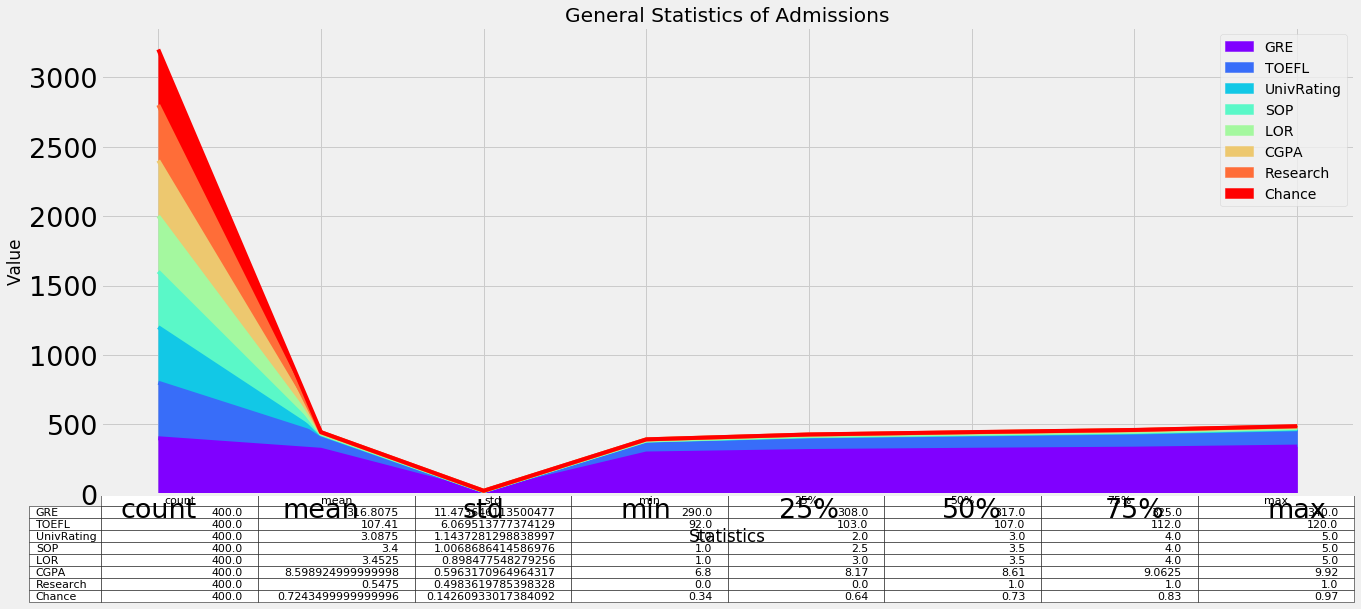

In [ ]:
admt.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Admissions")

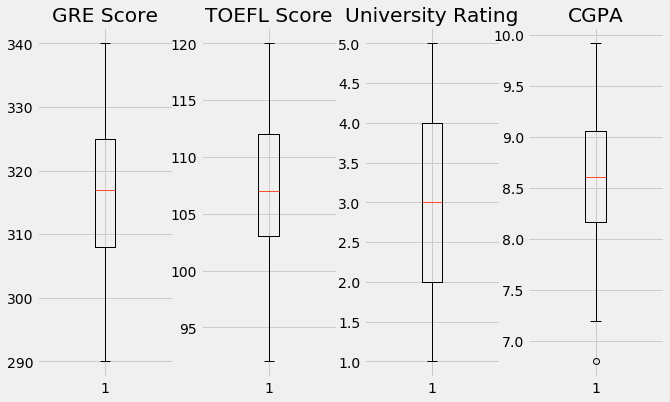

In [ ]:
plt.figure(1, figsize=(10,6))
plt.subplot(1,4, 1)
plt.boxplot(admt['GRE'])
plt.title('GRE Score')

plt.subplot(1,4,2)
plt.boxplot(admt['TOEFL'])
plt.title('TOEFL Score')

plt.subplot(1,4,3)
plt.boxplot(admt['UnivRating'])
plt.title('University Rating')

plt.subplot(1,4,4)
plt.boxplot(admt['CGPA'])
plt.title('CGPA')

plt.show()


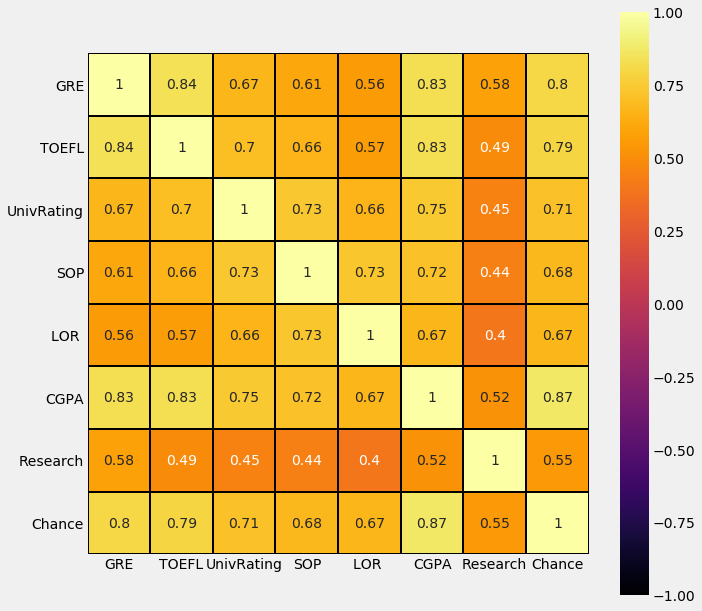

In [ ]:
fig=plt.gcf()
fig.set_size_inches(10,10)
fig=sns.heatmap(admt.corr(),annot=True,cmap='inferno',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [ ]:
#correlations_data = admt.corr()['Chance'].sort_values(ascending=False)
cor=admt.corr()['Chance']
# Print the correlations
print(cor)

GRE           0.802610
TOEFL         0.791594
UnivRating    0.711250
SOP           0.675732
LOR           0.669889
CGPA          0.873289
Research      0.553202
Chance        1.000000
Name: Chance, dtype: float64


In [ ]:
a=len(admt[admt.Research==1])
b=len(admt[admt.Research==0])
print('Total number of students',a+b)
print('Students having Research:',len(admt[admt.Research==1]))
print('Students not having Research:',len(admt[admt.Research==0]))

Total number of students 400
Students having Research: 219
Students not having Research: 181


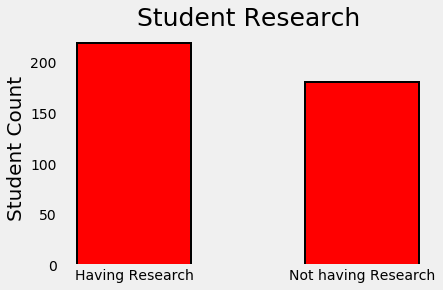

In [ ]:
y=np.array([len(admt[admt.Research==1]),len(admt[admt.Research==0])])
x=['Having Research','Not having Research']
ax=plt.bar(x,y,width=0.5,color='red',edgecolor='k',align='center',linewidth=2)
#plt.xlabel('',fontsize=20)
plt.ylabel('Student Count',fontsize=20)
#ax.tick_params(labelsize=20)
plt.title('Student Research',fontsize=25)
plt.grid()
plt.ioff()

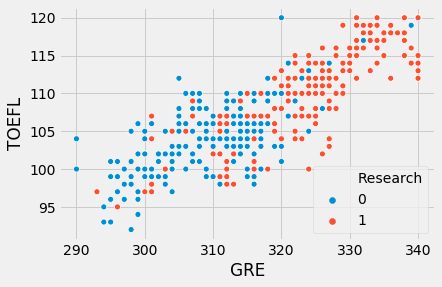

In [ ]:
sns.scatterplot(data=admt,x='GRE',y='TOEFL',hue='Research')

In [ ]:
admt_sort=admt.sort_values(by=admt.columns[-1],ascending=False)
admt_sort.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
143,340,120,4,4.5,4.0,9.92,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97
71,336,112,5,5.0,5.0,9.76,1,0.96


In [ ]:
admt_sort[(admt_sort['Chance']>0.90)].mean().reset_index()

,index,0
0,GRE,333.612245
1,TOEFL,116.285714
2,UnivRating,4.653061
3,SOP,4.561224
4,LOR,4.479592
5,CGPA,9.536939
6,Research,1.000000
7,Chance,0.937551


In [ ]:
admt.head()


,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X=admt.iloc[:,:-1].values
X[0]

array([337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ])

In [ ]:
y=admt.iloc[:,-1].values # or we can use y=data.iloc[:,3].values
y[0]

0.92

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test,pred1))
#('Accuracy for Linear Regression is ',metrics.accuracy_score(y_pred,y_test))

Mean Squared Error:  0.004617003377284988


In [ ]:
y_test

array([0.68, 0.68, 0.9 , 0.79, 0.44, 0.94, 0.43, 0.36, 0.72, 0.85, 0.45,
       0.93, 0.64, 0.93, 0.71, 0.53, 0.66, 0.34, 0.74, 0.96, 0.64, 0.54,
       0.71, 0.54, 0.92, 0.84, 0.59, 0.61, 0.7 , 0.74, 0.82, 0.94, 0.71,
       0.46, 0.69, 0.56, 0.72, 0.58, 0.61, 0.9 , 0.73, 0.64, 0.74, 0.94,
       0.92, 0.82, 0.96, 0.71, 0.94, 0.89, 0.86, 0.73, 0.81, 0.94, 0.39,
       0.48, 0.71, 0.86, 0.65, 0.86, 0.57, 0.61, 0.79, 0.44, 0.64, 0.74,
       0.64, 0.83, 0.89, 0.84, 0.75, 0.84, 0.9 , 0.88, 0.49, 0.72, 0.64,
       0.67, 0.9 , 0.79])

In [ ]:
pred1


array([0.65117446, 0.72368741, 0.93536809, 0.82164316, 0.58158673,
       0.92863016, 0.52682366, 0.54308993, 0.65940583, 0.83834924,
       0.72008833, 0.90749769, 0.55354476, 0.89008648, 0.70389539,
       0.68664473, 0.66657268, 0.48196096, 0.69057217, 0.97493132,
       0.58802433, 0.65286881, 0.71150098, 0.53528647, 0.94677007,
       0.80982947, 0.69459383, 0.56495613, 0.68192423, 0.81039878,
       0.80796481, 0.94640983, 0.64599494, 0.51104918, 0.65983663,
       0.66907811, 0.71572271, 0.64556878, 0.61540702, 0.87367833,
       0.74275261, 0.59782649, 0.77456683, 0.95944897, 0.85124125,
       0.83554825, 0.94662422, 0.64822919, 0.92247594, 0.85906183,
       0.89624998, 0.72869743, 0.78874783, 0.95142703, 0.57325803,
       0.58744723, 0.68621316, 0.84544646, 0.60495144, 0.84808919,
       0.66642894, 0.65524969, 0.70024808, 0.51206905, 0.62930376,
       0.7173701 , 0.62200838, 0.84170334, 0.85675802, 0.79886217,
       0.72196478, 0.81448203, 0.87373609, 0.83332085, 0.52554

In [ ]:
import pickle
filename = 'university_admit.h5'
pickle.dump(reg, open(filename, 'wb'))

In [ ]:
Score=['322','110','3','3.5','2.5','8.67','1']
Score=pd.DataFrame(Score).T
chance=reg.predict(Score)
chance

array([0.74604196])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred1)

0.8212082591487